# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# "imperial" provides fahrenheit

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=0117a1e8217ef5542cccf33cbf89fd8e&units=imperial&q='

In [4]:
# Set up lists to hold reponse info
city_name = []
lat = []
lon = []
temp = []
hum = []
cloud = []
wind = []
country = []
date = []

In [5]:
print("Beginning Data Retrieval")
print("-----------------------------")

# Loop through the list of cities
for city in cities:
    response = requests.get(query_url + city).json()
    
    # Pull cities with available weather data
    try:
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_name.append(response['name'])
#         city_name.append(city)
        print(f"Processing Record for {city}")
    except:
        print(f"City Not Found. Skipping...")
        pass
    
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


# Raw Data Sample
# [{'coord': {'lon': 44.22, 'lat': 17.54},
#   'weather': [{'id': 800,
#     'main': 'Clear',
#     'description': 'clear sky',
#     'icon': '01d'}],
#   'base': 'stations',
#   'main': {'temp': 16,
#    'feels_like': 13.25,
#    'temp_min': 16,
#    'temp_max': 16,
#    'pressure': 1020,
#    'humidity': 63},
#   'visibility': 10000,
#   'wind': {'speed': 3.6, 'deg': 70},
#   'clouds': {'all': 0},
#   'dt': 1578282635,
#   'sys': {'type': 1,
#    'id': 7421,
#    'country': 'SA',
#    'sunrise': 1578281690,
#    'sunset': 1578321722},
#   'timezone': 10800,
#   'id': 103630,
#   'name': 'Najran',
#   'cod': 200},

Beginning Data Retrieval
-----------------------------
Processing Record for lorengau
Processing Record for marawi
Processing Record for sucua
Processing Record for puerto ayora
Processing Record for mataura
Processing Record for severo-kurilsk
Processing Record for jamestown
City Not Found. Skipping...
Processing Record for obo
City Not Found. Skipping...
Processing Record for salalah
Processing Record for homer
Processing Record for estepona
Processing Record for port elizabeth
Processing Record for lompoc
Processing Record for butaritari
Processing Record for kaitangata
Processing Record for albany
Processing Record for hermanus
Processing Record for kodino
Processing Record for clyde river
Processing Record for east london
Processing Record for barrow
Processing Record for georgetown
City Not Found. Skipping...
Processing Record for ushuaia
Processing Record for ancud
Processing Record for emmett
City Not Found. Skipping...
Processing Record for bambous virieux
Processing Record fo

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | severo-kurilsk
Processing Record 2 of Set 1 | darhan
Processing Record 3 of Set 1 | tarakan
Processing Record 4 of Set 1 | komsomolskiy
Processing Record 5 of Set 1 | souillac
Processing Record 6 of Set 1 | jiuquan
Processing Record 7 of Set 1 | sesheke
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | clarence town
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | magadan
Processing Record 12 of Set 1 | salym
Processing Record 13 of Set 1 | carnarvon
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | arys
Processing Record 16 of Set 1 | prince rupert
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | rio gallegos
Processing Record 22 of Set 1 | kropotkin
Processing Record 23 of Set 1 | but

In [26]:
# Count length of arrays

print(f"City         {len(city_name)}")
print(f"Cloudiness   {len(cloud)}")
print(f"Country      {len(country)}")
print(f"Date         {len(date)}")
print(f"Humidity     {len(hum)}")
print(f"Latitude     {len(lat)}")
print(f"Longitude    {len(lon)}")
print(f"Max Temp     {len(temp)}")
print(f"Wind Speed   {len(wind)}")

City         527
Cloudiness   527
Country      527
Date         527
Humidity     527
Latitude     527
Longitude    527
Max Temp     527
Wind Speed   527


City          535
Cloudiness    535
Country       535
Date          535
Humidity      535
Lat           535
Lng           535
Max Temp      535
Wind Speed    535
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create dictionary of weather data
weather_dict = {
    "City": city_name,
    "Cloudiness": cloud,
    "Country": country,
    "Date": date,
    "Humidity": hum,
    "Lat": lat,
    "Lng": lon,
    "Max_Temp": temp,
    "Wind_Speed": wind
}

# Create a Data Frame
weather_df = pd.DataFrame(weather_dict)
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,Lorengau,50,PG,1578373923,73,-2.02,147.27,84.87,8.63
1,Marawi,100,PH,1578373924,81,8.00,124.29,82.00,11.99
2,Sucua,48,EC,1578373924,97,-2.46,-78.17,64.62,2.68
3,Puerto Ayora,25,EC,1578373924,82,-0.74,-90.35,75.99,1.01
4,Mataura,84,NZ,1578373924,70,-46.19,168.86,57.00,11.99
...,...,...,...,...,...,...,...,...,...
522,Kathu,100,ZA,1578374016,71,-27.70,23.05,69.01,11.59
523,Hongjiang,0,CN,1578374017,62,27.21,109.83,58.96,4.97
524,Newport,86,GB,1578374017,87,51.59,-3.00,46.99,11.41
525,Mount Gambier,40,AU,1578373812,34,-37.83,140.78,78.80,12.75


In [9]:
# Export DataFrame to CSV
weather_df.to_csv('WeatherData.csv')

In [27]:
# # Pull Raw Data
# responses = []

# for city in cities:
#     weather_data = requests.get(query_url + city).json()
#     responses.append(weather_data)
# # type(responses)
# responses
# # print(json.dumps(responses, indent=4, sort_keys=True))

# # if statement to eliminat nan data

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [10]:
# Date DataFrame
date_df = weather_df.loc[weather_df.Date == 1578373933]
date_df

# https://www.epochconverter.com/


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
54,Cidreira,59,BR,1578373933,85,-30.17,-50.22,74.26,11.14
55,Hilo,20,US,1578373933,57,19.71,-155.08,78.80,5.82
56,Namatanai,89,PG,1578373933,65,-3.66,152.44,86.45,1.48
57,Smolenka,99,PL,1578373933,94,54.15,22.76,33.01,6.17
58,Keflavik,90,IS,1578373933,97,64.00,-22.56,32.00,29.97
59,Luderitz,58,NA,1578373933,82,-26.65,15.16,60.80,18.34
60,Katsuura,75,JP,1578373933,87,33.93,134.50,51.80,17.22
61,San Cristobal,100,HN,1578373933,98,14.68,-86.92,59.47,3.22
62,Ahipara,99,NZ,1578373933,68,-35.17,173.16,62.15,20.40
63,Westport,1,US,1578373933,48,41.14,-73.36,43.00,8.05


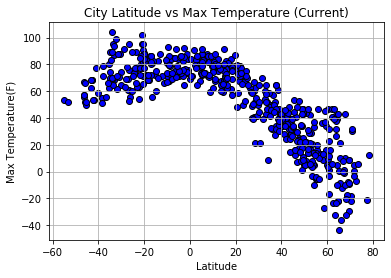

In [19]:
# Build Latitude vs. Temperature Plot

lat_temp_plot = plt.scatter(weather_df.Lat, weather_df.Max_Temp, marker="o", facecolors="blue", edgecolors="black")

# # Add title, labels & grid lines
plt.title("City Latitude vs Max Temperature (Current)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")

plt.grid(True)

plt.show()

# NOTE: My scatter plots only provide the current weather data.  
# I did not purchase the historical data from Openweathermap

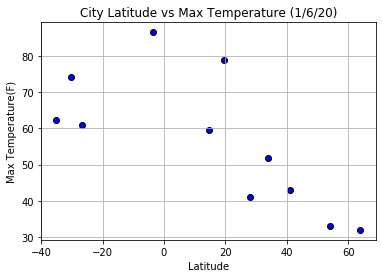

In [17]:
# Build Latitude vs. Temperature Plot

lat_temp_plot = plt.scatter(date_df.Lat, date_df.Max_Temp, marker="o", facecolors="blue", edgecolors="black")

# # Add title, labels & grid lines
plt.title("City Latitude vs Max Temperature (1/6/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")

plt.grid(True)

plt.show()



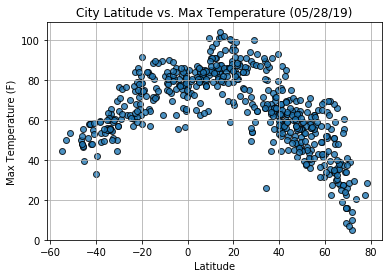

#### Latitude vs. Humidity Plot

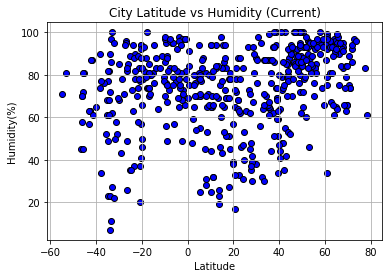

In [21]:
# Build Latitude vs. Humidity Plot

lat_hum_plot = plt.scatter(weather_df.Lat, weather_df.Humidity, marker="o", facecolors="blue", edgecolors="black")

# Add title, labels & grid lines
plt.title("City Latitude vs Humidity (Current)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

plt.grid(True)

plt.show()

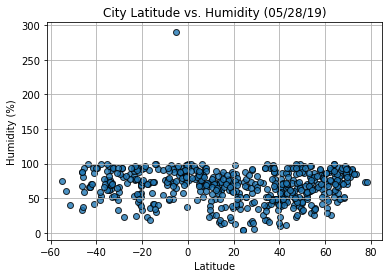

#### Latitude vs. Cloudiness Plot

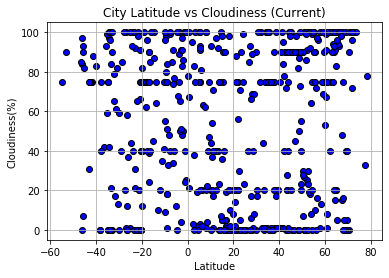

In [22]:
# Build Latitude vs. Cloudiness Plot

lat_cloud_plot = plt.scatter(weather_df.Lat, weather_df.Cloudiness, marker="o", facecolors="blue", edgecolors="black")

# Add title, labels legend & grid lines
plt.title("City Latitude vs Cloudiness (Current)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

plt.grid(True)

plt.show()

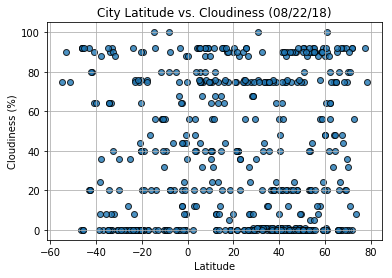

#### Latitude vs. Wind Speed Plot

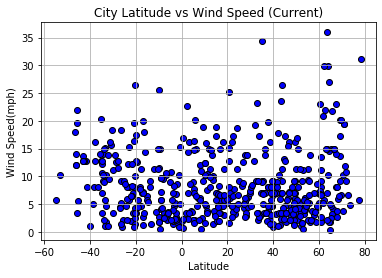

In [24]:
# Build Latitude vs. Wind Speed Plot

lat_wind_plot = plt.scatter(weather_df.Lat, weather_df.Wind_Speed, marker="o", facecolors="blue", edgecolors="black")

# # Add title, labels legend & grid lines
plt.title("City Latitude vs Wind Speed (Current)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")

plt.grid(True)

plt.show()

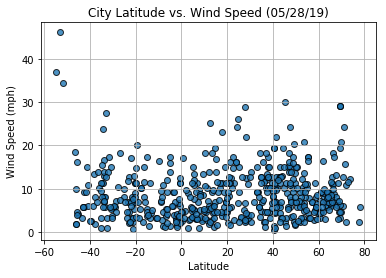

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


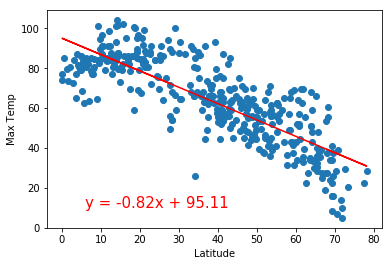

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


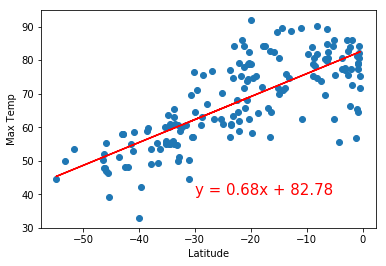

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


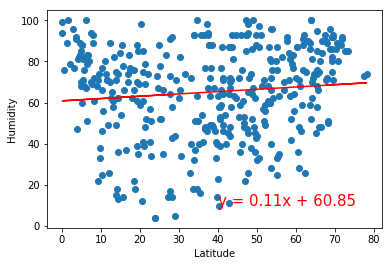

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


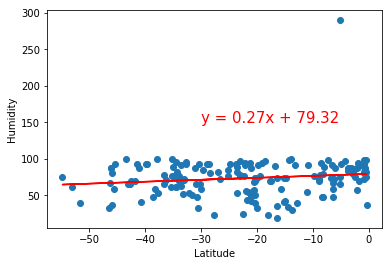

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


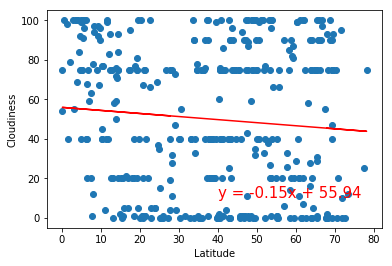

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


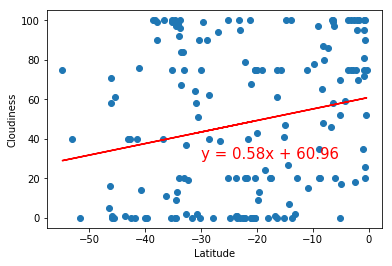

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


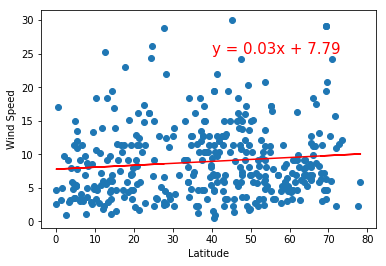

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


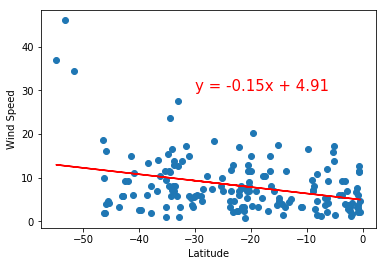